In [1]:
import pymysql
from sqlalchemy.types import String, Float, Integer
from sqlalchemy import DateTime
from sqlalchemy import create_engine
from sqlalchemy import exc
import os
import re
import pandas as pd
import numpy as np
import datetime as dt#准备工作，配置环境。

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime

from pylab import mpl
mpl.rcParams['font.sans-serif']=['KaiTi']
mpl.rcParams['axes.unicode_minus']=False

from matplotlib.backends.backend_pdf import PdfPages

In [2]:
from pylab import mpl
mpl.rcParams['font.sans-serif']=['KaiTi']
mpl.rcParams['axes.unicode_minus']=False

In [3]:
# 导入数据
conn = pymysql.connect(	
    host = '47.116.3.109',	
    user = 'dngj',	
    passwd = '603603',	
    db = 'finance',	
    port=3306,	
    charset = 'utf8'	
    )	
rates = pd.read_sql('select * from finance.rates1',conn)
rates_us = pd.read_sql('select * from finance.rates_us',conn)

In [4]:
rates

,国债1年,国债3年,国债5年,国债7年,国债10年,地方1年,地方3年,地方5年,地方7年,地方10年,...,国债3月,国债6月,国债20年,国开3月,国开6月,国开20年,国开30年,cd_3m_aaa+,国债2年,date
0,2.5850,2.7271,2.8674,3.0057,3.2096,NaN,NaN,NaN,NaN,NaN,...,2.5312,2.5492,3.8586,NaN,2.4262,4.2020,4.0462,NaN,2.6563,2002-01-04
1,2.6009,2.7380,2.8728,3.0055,3.2003,NaN,NaN,NaN,NaN,NaN,...,2.5489,2.5663,3.8140,NaN,2.4827,4.2375,4.0414,NaN,2.6697,2002-01-07
2,1.9156,2.3842,2.7890,3.1302,3.5225,NaN,NaN,NaN,NaN,NaN,...,1.7235,1.7885,3.7951,NaN,2.3470,4.3868,4.1288,NaN,2.1578,2002-01-08
3,1.9040,2.4036,2.8317,3.1884,3.5896,NaN,NaN,NaN,NaN,NaN,...,1.6983,1.7680,3.7660,NaN,2.3652,4.3702,4.0866,NaN,2.1627,2002-01-09
4,1.8987,2.3954,2.8216,3.1772,3.5784,NaN,NaN,NaN,NaN,NaN,...,1.6942,1.7635,3.7693,NaN,2.3688,4.3747,4.0863,NaN,2.1559,2002-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4862,2.5252,2.8089,2.9598,3.0763,3.0877,2.5446,3.0581,3.2363,3.3680,3.4354,...,1.9658,2.2010,3.5285,1.9967,2.3052,3.7184,3.9475,2.4200,2.7200,2021-06-22
4863,2.5012,2.7860,2.9514,3.0671,3.0853,2.5432,3.0454,3.2232,3.3672,3.4303,...,1.9509,2.1912,3.5185,1.9700,2.2672,3.7127,3.9175,2.4302,2.6949,2021-06-23
4864,2.4690,2.7675,2.9489,3.0714,3.0828,2.5229,3.0230,3.2156,3.3595,3.4157,...,1.9661,2.1948,3.5172,1.9825,2.2922,3.7123,3.8875,2.4221,2.6776,2021-06-24
4865,2.4437,2.7614,2.9506,3.0783,3.0827,2.4950,3.0147,3.2043,3.3553,3.4058,...,1.9151,2.1855,3.5122,1.9503,2.2549,3.7147,3.8775,2.4191,2.6655,2021-06-25


In [5]:
rates = rates.loc[rates['date'] >= '2019-01-01']
rates
#计算利差
margin1 = rates['国债7年']-rates['国债10年']
margin2 = rates['国开7年']-rates['国开10年']
margin3 = rates['国债30年']-rates['国债10年']
margin4 = rates['国债10年']-rates['国债1年']
margin5 = rates['国债3年']-rates['国债1年']
margin6 = rates['国开10年']-rates['农发10年']
margin7 = rates['国开10年']-rates['口行10年']

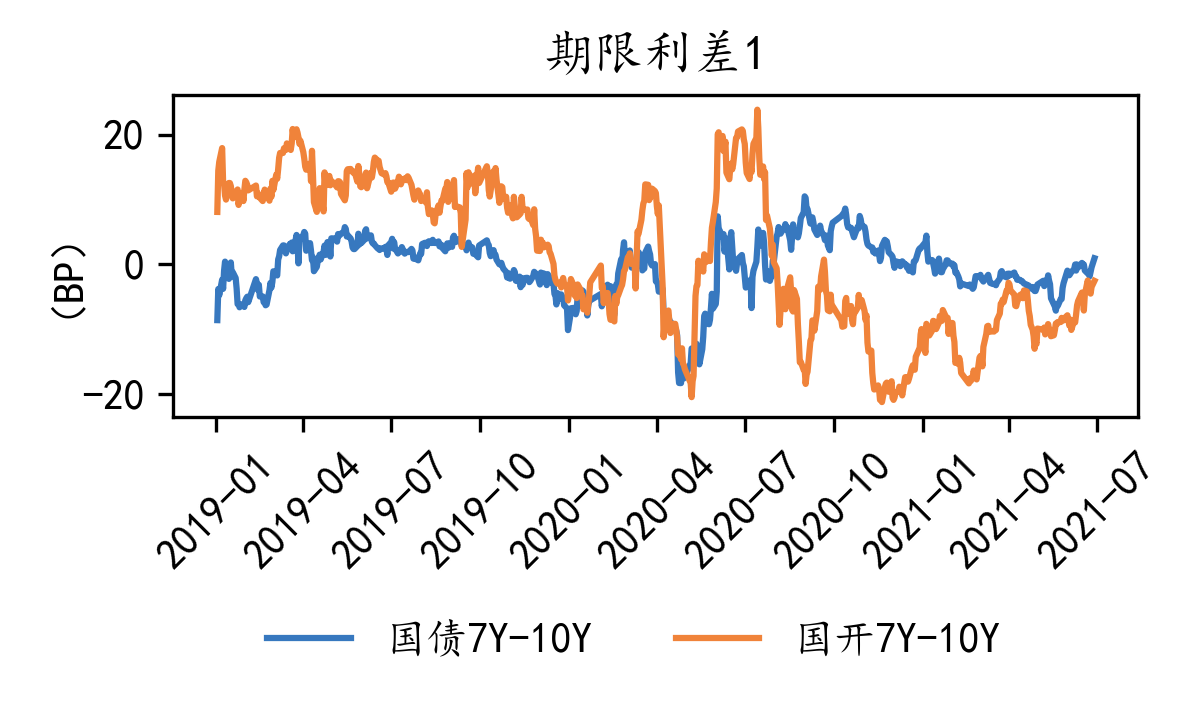

In [6]:
#绘制期限利差1
fig,ax = plt.subplots(figsize=(4.15,1.42),dpi = 300)
plt.plot(rates['date'],margin1*100,'#3778bf',label="国债7Y-10Y")
plt.plot(rates['date'],margin2*100,'#f0833a',label='国开7Y-10Y')

plt.title('期限利差1', fontsize=12)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10,rotation=0)
plt.ylabel('（BP）',fontsize=10)
plt.legend(ncol=3,loc=3, bbox_to_anchor=(0.08,-0.8),borderaxespad = 0.,fontsize=10,frameon=False)
plt.savefig('期限利差1.jpg', dpi=300, bbox_inches = 'tight')
plt.show()

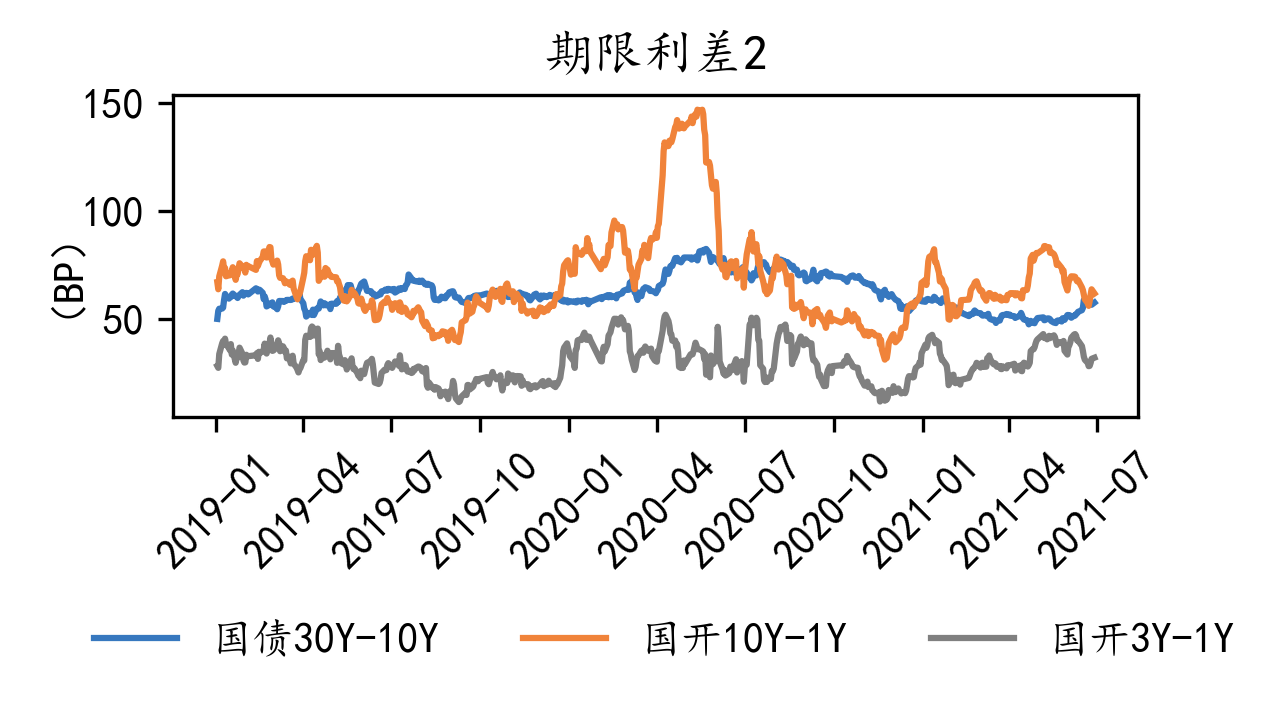

In [7]:
#绘制期限利差2
fig,ax = plt.subplots(figsize=(4.15,1.42),dpi = 300)
plt.plot(rates['date'],margin3*100,'#3778bf',label="国债30Y-10Y")
plt.plot(rates['date'],margin4*100,'#f0833a',label='国开10Y-1Y')
plt.plot(rates['date'],margin5*100,'gray',label='国开3Y-1Y')

plt.title('期限利差2', fontsize=12)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10,rotation=0)
plt.ylabel('（BP）',fontsize=10)
plt.legend(ncol=3,loc=3, bbox_to_anchor=(-0.1,-0.8),borderaxespad = 0.,fontsize=10,frameon=False)
plt.savefig('期限利差2.jpg', dpi=300, bbox_inches = 'tight')
plt.show()

In [8]:
tax_rate = 1 - rates['国债10年']/rates['国开10年']

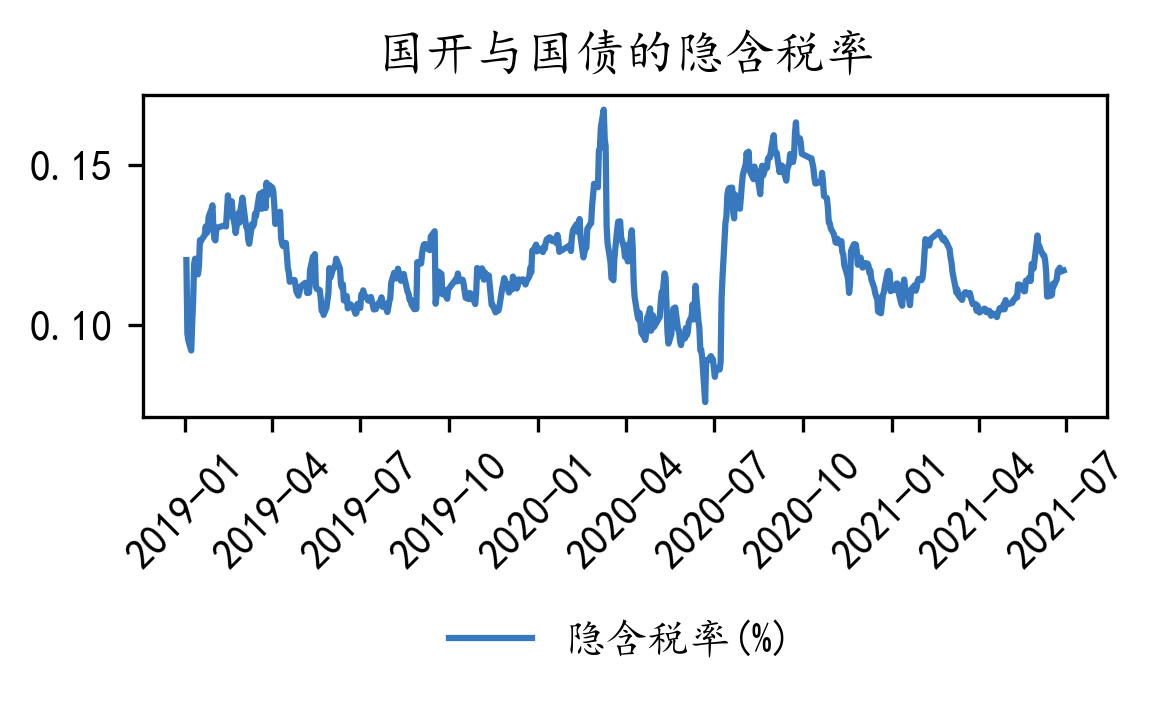

In [10]:
#国开与国债的隐含税率 (1-10年国债/10年国开)
fig,ax = plt.subplots(figsize=(4.15,1.42),dpi = 300)
plt.plot(rates['date'],tax_rate,'#3778bf',label="隐含税率(%)")

plt.title('国开与国债的隐含税率', fontsize=12)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10,rotation=0)
plt.legend(ncol=3,loc=3, bbox_to_anchor=(0.3,-0.8),borderaxespad = 0.,fontsize=10,frameon=False)
plt.savefig('国开与国债的隐含税率.jpg', dpi=300, bbox_inches = 'tight')
plt.show()

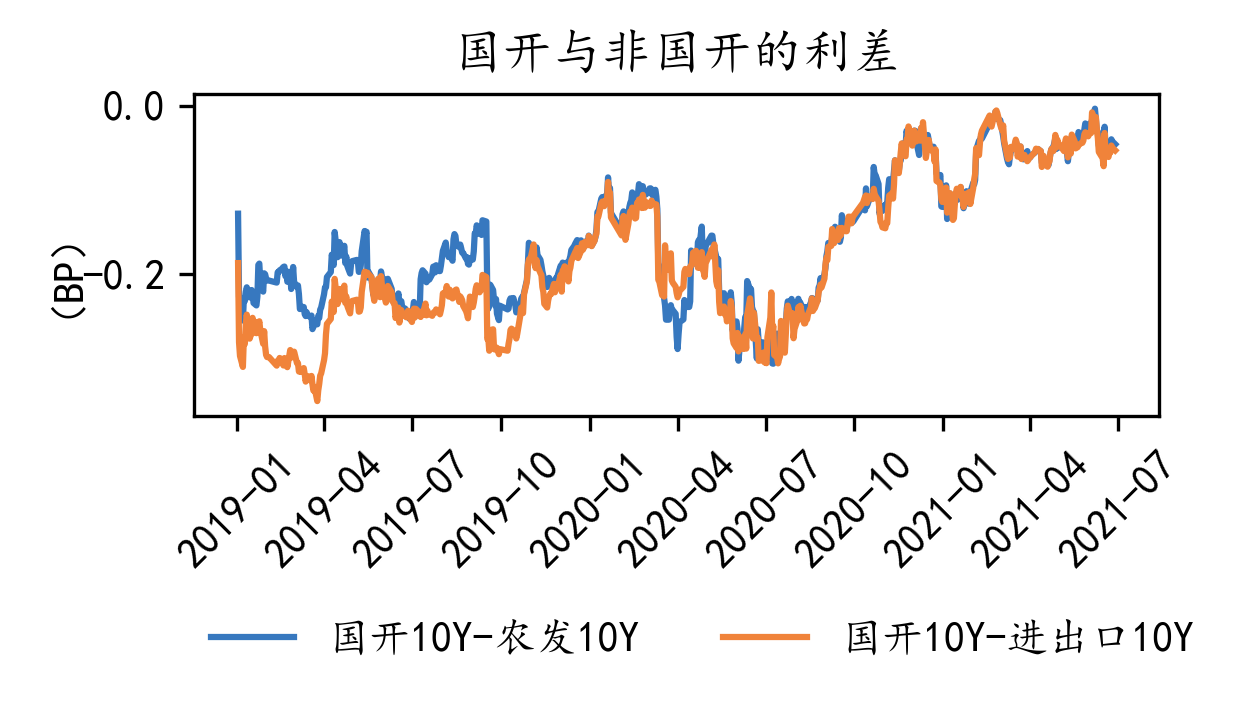

In [11]:
#绘制国开与非国开的利差
fig,ax = plt.subplots(figsize=(4.15,1.42),dpi = 300)
plt.plot(rates['date'],margin6,'#3778bf',label="国开10Y-农发10Y")
plt.plot(rates['date'],margin7,'#f0833a',label='国开10Y-进出口10Y')

plt.title('国开与非国开的利差', fontsize=12)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10,rotation=0)
plt.ylabel('（BP）',fontsize=10)
plt.legend(ncol=3,loc=3, bbox_to_anchor=(0,-0.8),borderaxespad = 0.,fontsize=10,frameon=False)
plt.savefig('国开与非国开的利差.jpg', dpi=300, bbox_inches = 'tight')
plt.show()